In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

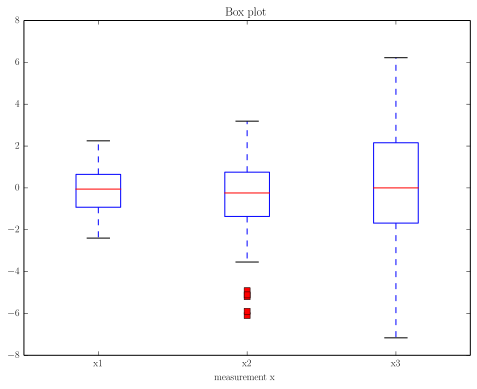

In [11]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# We use boxplots from matplotlib in this example
# See http://nbviewer.ipython.org/github/rasbt/matplotlib-gallery/blob/master/ipynb/boxplots.ipynb
# [Boxplots are also available in pandas]
# [See http://nbviewer.ipython.org/github/herrfz/dataanalysis/blob/master/week3/exploratory_graphs.ipynb]

all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]

fig = plt.figure(figsize=(8,6))

plt.boxplot(all_data, 
            notch=False, # box instead of notch shape 
            sym='rs',    # red squares for outliers
            vert=True)   # vertical box aligmnent

plt.xticks([y+1 for y in range(len(all_data))], ['x1', 'x2', 'x3'])
plt.xlabel('measurement x')
t = plt.title('Box plot')
plt.show()

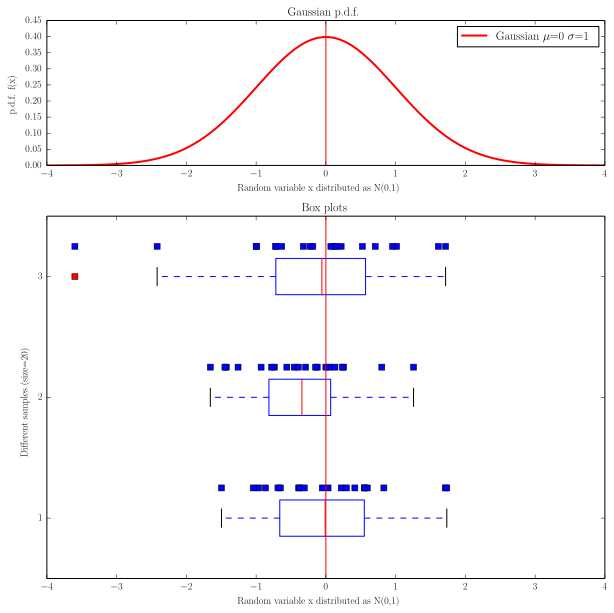

In [13]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

fig = plt.figure(figsize=(10,10))
from matplotlib import gridspec
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2.5]) 

# Boxplots in lower subplot
# See http://nbviewer.ipython.org/github/rasbt/matplotlib-gallery/blob/master/ipynb/boxplots.ipynb
nsam=3  # number of samples
size=20 # sample size
data = [np.random.normal(0, 1, size) for isample in range(1,nsam+1)]
###ax = fig.add_subplot(212)
ax = fig.add_subplot(gs[1])
###ax.set_yticks([i+1 for i in range(len(data))], ['Sample '+str(i+1) for i in range(len(data))])
ax.boxplot(data, notch=False, sym='rs', vert=False)
ax.set_xlim([-4,4])
ax.set_ylim([0.5,nsam+0.5])
yarr = np.empty(size)
for i in range(len(data)): 
    yarr.fill(i+1.25)
    ax.plot(data[i], yarr, 'bs')
ax.axvline(0,color='r')
ax.set_xlabel('Random variable x distributed as N(0,1)')
ax.set_ylabel('Different samples (size='+str(size)+')', labelpad=8)
ax.set_title('Box plots')

# Normal pdf in top subplot
from scipy.stats import norm
###ax = fig.add_subplot(211)
ax = fig.add_subplot(gs[0])
x = np.linspace(-4,4, 100)
ax.set_xlim([-4,4])
ymax=0.45
ax.set_ylim([0,ymax])
ax.plot(x, norm.pdf(x), '-r', lw=2, alpha=1, label='Gaussian $\mu$=0 $\sigma$=1')
ax.axvline(0,color='r')
ax.set_xlabel('Random variable x distributed as N(0,1)')
ax.set_ylabel('p.d.f. f(x)', labelpad=8)
ax.set_title('Gaussian p.d.f.')
ax.legend(loc='best', frameon=True, numpoints=1)

# Show plot and save it
###plt.savefig('WA_AV002_plot1_boxplot.png',dpi=600)
plt.show()

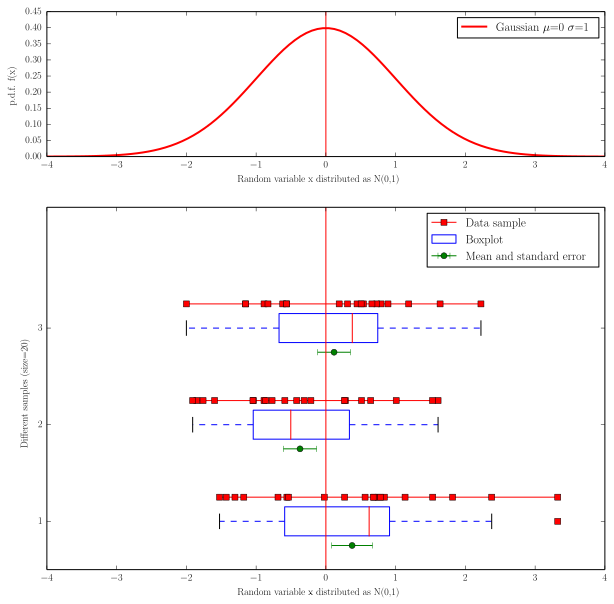

In [15]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

fig = plt.figure(figsize=(10,10))
from matplotlib import gridspec
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2.5]) 

# Boxplots in lower subplot
# See http://nbviewer.ipython.org/github/rasbt/matplotlib-gallery/blob/master/ipynb/boxplots.ipynb
nsam=3  # number of samples
size=20 # sample size
data = [np.random.normal(0, 1, size) for isample in range(1,nsam+1)]
###ax = fig.add_subplot(212)
ax = fig.add_subplot(gs[1])
###ax.set_yticks([i+1 for i in range(len(data))], ['Sample '+str(i+1) for i in range(len(data))])
ax.boxplot(data, notch=False, sym='rs', vert=False)
ax.set_xlim([-4,4])
ax.set_ylim([0.5,nsam+1.25])
yarr = np.empty(size)
for i in range(len(data)): 
    yarr.fill(i+1.25)
    ###dots = ax.plot(data[i], yarr, 'bs')
    ###dots = ax.errorbar(data[i], yarr, marker='s',mfc='r',ecolor='r',fmt='')
    dots = ax.errorbar(data[i], yarr, marker='s',color='r',fmt='')
    msem = ax.errorbar(np.average(data[i]),i+0.75,xerr=stats.sem(data[i]),marker='o',color='g')
ax.axvline(0,color='r')
ax.set_xlabel('Random variable x distributed as N(0,1)')
ax.set_ylabel('Different samples (size='+str(size)+')', labelpad=8)
###ax.set_title('Box plots')
import matplotlib.patches as mpatches
bplt = mpatches.Patch(color='blue',fill=False)
ax.legend([dots,bplt,msem],['Data sample','Boxplot','Mean and standard error'], numpoints=1)

# Normal pdf in top subplot
from scipy.stats import norm
###ax = fig.add_subplot(211)
ax = fig.add_subplot(gs[0])
x = np.linspace(-4,4, 100)
ax.set_xlim([-4,4])
ymax=0.45
ax.set_ylim([0,ymax])
ax.plot(x, norm.pdf(x), '-r', lw=2, alpha=1, label='Gaussian $\mu$=0 $\sigma$=1')
ax.axvline(0,color='r')
ax.set_xlabel('Random variable x distributed as N(0,1)')
ax.set_ylabel('p.d.f. f(x)', labelpad=8)
###ax.set_title('Gaussian p.d.f.')
ax.legend(loc='best', frameon=True, numpoints=1)

# Show plot and save it
###plt.savefig('WA_AV002_plot2_boxplot_sem.png',dpi=600)
plt.show()